In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

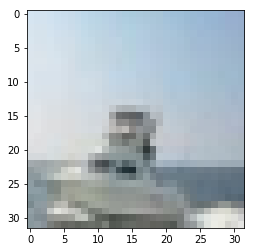

In [6]:
plt.imshow(x_train[100])

In [7]:
x_train.max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
from keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [14]:
model4 = Sequential()

model4.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model4.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(filters=64,kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model4.add(Conv2D(filters=64,kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Flatten())

#128,256,512
model4.add(Dense(512, activation='relu'))

model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model4.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flat

In [15]:
model4.fit(x_train,y_cat_train,verbose=1,epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
50000/50000 [==============================] - 425s 8ms/step - loss: 1.5253 - acc: 0.4387


In [16]:
model4.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 21s 2ms/step


[1.3876373104095459, 0.4949]

In [17]:
from sklearn.metrics import classification_report
predictions = model4.predict_classes(x_test)

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1000
           1       0.77      0.66      0.71      1000
           2       0.48      0.26      0.34      1000
           3       0.26      0.32      0.29      1000
           4       0.48      0.34      0.39      1000
           5       0.32      0.74      0.44      1000
           6       0.81      0.19      0.31      1000
           7       0.64      0.57      0.60      1000
           8       0.53      0.75      0.62      1000
           9       0.69      0.61      0.65      1000

   micro avg       0.49      0.49      0.49     10000
   macro avg       0.55      0.49      0.49     10000
weighted avg       0.55      0.49      0.49     10000



In [25]:
from keras.models import Sequential
from keras.layers import Dropout,Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [36]:
def all_cnn(weights=None):
    
    model = Sequential() 
    
    model.add(Conv2D(96,(3,3),padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1), padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1), padding='valid'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if weights:
        model.load_weights(weights)
        
    return model


lrr=0.01
weight_decay=1e-6
momentum=0.9

model = all_cnn()
agd=SGD(lr=lrr, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=agd, metrics=['accuracy'])
print(model.summary())

epochs = 10
batch_size = 32
model.fit(x_train, y_cat_train, validation_data=(x_test,y_cat_test),epochs=epochs,batch_size=batch_size, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_52 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_53 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 192)       166080    
__________

KeyboardInterrupt: 

### As we already have weights - lets jump to that

In [39]:
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model1 = all_cnn(weights)
agd=SGD(lr=lrr, decay=weight_decay, momentum=momentum, nesterov=True)
model1.compile(loss='categorical_crossentropy', optimizer=agd, metrics=['accuracy'])
print(model1.summary())

scores = model1.evaluate(x_test, y_cat_test, verbose=1)
print('Accuracy: {}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_73 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_74 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 16, 16, 192)       166080    
__________

In [40]:
classes = range(0,10)

name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels = dict(zip(classes, name))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [42]:
import numpy as np
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=1)
predictions = model.predict(batch, verbose=1)

9/9 [==============================] - 4s 393ms/step


In [47]:
print(predictions) #softmax

[[0.10573182 0.10572498 0.09658044 0.10061954 0.09576064 0.09825931
  0.10493621 0.09976663 0.09745758 0.09516297]
 [0.10595652 0.10574865 0.09655023 0.10062332 0.09551089 0.09817874
  0.10506228 0.09968491 0.09743529 0.09524906]
 [0.10461942 0.1056402  0.09652839 0.10085735 0.09634461 0.09860919
  0.10470489 0.10008509 0.09728854 0.09532224]
 [0.10552761 0.10563347 0.09656383 0.10059293 0.09572662 0.098398
  0.10505721 0.09985538 0.09746917 0.09517575]
 [0.10558242 0.10571294 0.09661508 0.10062115 0.09590575 0.09828794
  0.10483544 0.09978364 0.09741054 0.09524515]
 [0.10687583 0.10571633 0.09677319 0.10033949 0.09488888 0.09777781
  0.10534265 0.09945486 0.09746321 0.09536775]
 [0.10518772 0.10563883 0.09652676 0.10074209 0.09608413 0.09844867
  0.10481569 0.09992222 0.09738798 0.09524587]
 [0.10458187 0.10556825 0.09649226 0.1009182  0.09644385 0.09863261
  0.10468078 0.10015565 0.09729946 0.09522713]
 [0.10616604 0.10579895 0.09663624 0.10054202 0.09536874 0.09816168
  0.10502229 0

In [49]:
for i in predictions:
    print(np.sum(i))

1.0000001
0.9999999
0.99999994
0.99999994
1.0000001
1.0
1.0
1.0000001
0.9999998


In [51]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[0 0 1 1 1 0 1 1 0]


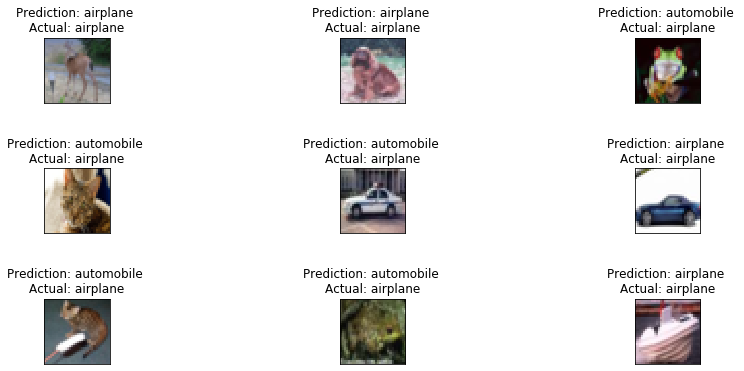

In [63]:
fig, axs = plt.subplots(3,3, figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img.transpose([0,1,2]))
plt.show()